# COSC 311 Final Exam

Monday, May 22, 2023, 10:45 a.m.- 1:15 p.m.

To finish this exam, please download the Jupyter Notebook file and datasets from the exam instructions. You have 150 minutes to finish.

This is an open-book exam. You may use the lecture notes, textbook, and online tutorials. However, you are NOT allowed to search any related example code and/or solution from any internet sources.

Note: You need to **copy and paste your source code in the Answer Area after each question on MyClasses**. In addition, you also need to **upload this Jupyter Notebook file (".ipynb") with all your source code and test results** to the last task of this exam on MyClasses.

### Question 1 (25 points):

Use the attached Science News paper ("ScienceNews.txt"), write a Python program to analyze this paper and answer the following questions.

Task 1: How many different words appeared in this paper?

Task 2: What are the 5 words that appear most frequently (from high to low)?

Task 3: What are the appearance frequencies for the following words?
- sharks
- ocean
- body
- water

Task 4: Draw a bar figure to show the average length of words for each appearance frequency.

Note: you may use **file = open('ScienceNews.txt', 'r', errors='ignore')** to open the file if there is encoding/decoding error.

There are 331 words in the document
The 5 words that appear the most are: 
['THE']
['TO']
['OF']
['SHARKS', 'AND']
['THEIR']
Sharks: 16, Ocean: 4, Body: 7, Water: 2


Text(0, 0.5, 'Average Length')

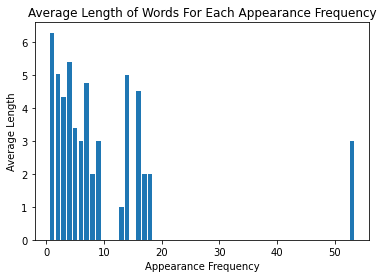

In [26]:
words = {}
with open('ScienceNews.txt', 'r', errors='ignore') as file:
    new_line = file.readline()
    tokens = []
    for line in file:
        tokens = line.upper().replace(',','').replace(';','').replace('(','').replace(')','')\
        .replace('!','').replace('?','').replace('.','').split()
        for word in tokens:
            try:
                words[word] += 1
            except:
                words[word] = 1
                
print("There are " + str(len(words.keys())) + " words in the document")

sharks = words['SHARKS']
ocean = words['OCEAN']
body = words['BODY']
water = words['WATER']

words_reverse = {}
for word,count in words.items():
    try:
        words_reverse[count].append(word)
    except:
        words_reverse[count] = [word]
keys = sorted(words_reverse, reverse=True)

print("The 5 words that appear the most are: ")
i = 0
for key in keys:
    if i > 4:
        break
    print(words_reverse[key])
    i += 1

print("Sharks: " + str(sharks) + ", Ocean: " + str(ocean) + ", Body: "+ str(body) + ", Water: " +str(water))

avg_len = [sum([len(word) for word in value]) / len(value) for value in words_reverse.values()]
appearances = list(words_reverse.keys())

import matplotlib.pyplot as plt 
plt.bar(appearances, avg_len)
plt.title('Average Length of Words For Each Appearance Frequency')
plt.xlabel('Appearance Frequency')
plt.ylabel('Average Length')

### Question 2 (25 pints):

Please use the "Housing Dataset" attached to finish the following tasks. **Each figure needs to show title, xlabel, and ylabel**.

Task 1: Draw a scatterplot figure to show the relationship between "median_income" and "total_bedrooms";

Task 2: Draw a bar figure to show the **average** "median_house_value" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

Task 3: Draw a histogram to show the "total_rooms" distribution in 5 bins for the "NEAR OCEAN" houses

Task 4: Draw a bar figure to show the **maximum** "households" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

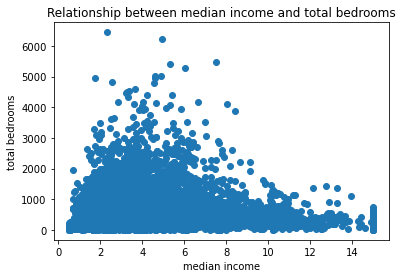

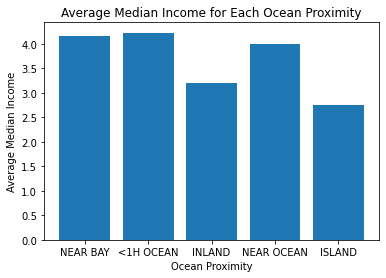

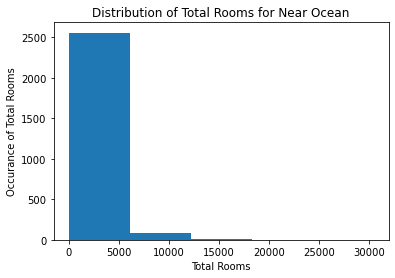

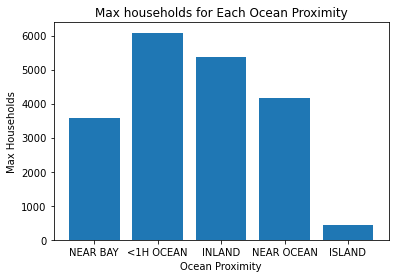

In [27]:
import pandas as pd
df = pd.read_csv("housing.csv")
plt.scatter(df['median_income'], df['total_bedrooms'])
plt.title("Relationship between median income and total bedrooms")
plt.xlabel('median income')
plt.ylabel('total bedrooms')
plt.show()

bay = df['median_income'][df['ocean_proximity'] == 'NEAR BAY'].mean()
ocean_1 = df['median_income'][df['ocean_proximity'] == '<1H OCEAN'].mean()
inland = df['median_income'][df['ocean_proximity'] == 'INLAND'].mean()
near_ocean = df['median_income'][df['ocean_proximity'] == 'NEAR OCEAN'].mean()
island = df['median_income'][df['ocean_proximity'] == 'ISLAND'].mean()

plt.bar(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], [bay, ocean_1, inland, near_ocean, island])
plt.title('Average Median Income for Each Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Median Income')
plt.show()

rooms = df['total_rooms'][df['ocean_proximity'] == 'NEAR OCEAN']

plt.hist(rooms, bins=5)
plt.title('Distribution of Total Rooms for Near Ocean')
plt.xlabel('Total Rooms')
plt.ylabel('Occurance of Total Rooms')
plt.show()

bay = df['households'][df['ocean_proximity'] == 'NEAR BAY'].max()
ocean_1 = df['households'][df['ocean_proximity'] == '<1H OCEAN'].max()
inland = df['households'][df['ocean_proximity'] == 'INLAND'].max()
near_ocean = df['households'][df['ocean_proximity'] == 'NEAR OCEAN'].max()
island = df['households'][df['ocean_proximity'] == 'ISLAND'].max()

plt.bar(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], [bay, ocean_1, inland, near_ocean, island])
plt.title('Max households for Each Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Max Households')
plt.show()

### Question 3 (25 points):

Please use the "breast cancer dataset" included in the scikit-learn library to conduct the following classfication tasks. 

Task 1: Randomly split this dataset into two parts: 70% for training and 30% for testing. 

Task 2: Use KNN classification algorithm to conduct experiments and find out the most appropriate parameter for *k (1 <= k <= 15)* that obtains the highest testing accuracy. You need to draw a figure to show the accuracies for different values of *k*;

Task 3: Use the split dataset in Task 1 and the best *k* value selected in Task 2, conduct independent test, then show the results using **Classification Report** and draw the confusion matrix (in a figure);  

Task 4: Use the WHOLE dataset and the best *k* value selected in Task 2, conduct a 5-fold cross validation test and show the average accuracy. 

[1.         0.97236181 0.95477387 0.94974874 0.94974874 0.95477387
 0.94723618 0.94974874 0.94221106 0.94472362 0.94221106 0.94221106
 0.94221106 0.94472362 0.94221106]


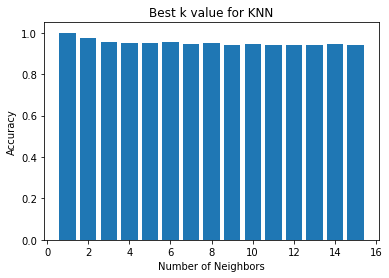

1.0
[[ 64   0]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00       107

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



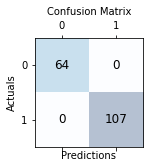

Avg accuracy: 0.9068778140040366


In [28]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold 

data = load_breast_cancer(as_frame = True)
df = data.frame # type: ignore
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42, stratify=y)
    
depth = np.arange(1, 16)
accuracy = np.empty(len(depth))

for i, k in enumerate(depth):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy[i] = knn.score(X_train, y_train)
    
print(accuracy)

plt.bar(depth, accuracy)
plt.title('Best k value for KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X, y)
score = knn.score(X_test, y_test)
print(score)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)

report = classification_report(y_test, y_pred)
print(report)

fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3) # type: ignore
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k, random_state=None)
knn = KNeighborsClassifier(n_neighbors=1)
 
result = cross_val_score(knn , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))



### Question 4 (25 points):

Please use the UCI ML hand-written digits dataset in our lecture note "COSC311_Module5_4_Kmeans clustering", which is included in the scikit-learn library.

Task 1: Conduct PCA analysis on the dataset and find out how many principal components are needed to keep at least 85% variance (i.e. the ratio of variance loss, η, is less than 15%).

Task 2: Assume *m* principal components are needed to keep at least 85% variance, transform the dataset from 64 dimensions to *m* dimensions.

Task 3: Based on the above dimension-reduced dataset, conduct k-means clustering (*k* = 10, each cluster is a digit), output the center of each cluster.

Task 4: Match each learned cluster label with the true label (i.e. ground truth) using **mode** function in **scipy.stats** package (i.e. based on most common value), calculate and output the clustering accuracy, and show the corresponding confusion matrix as a figure.

(1797, 64)
(1797, 64)
(10, 64)


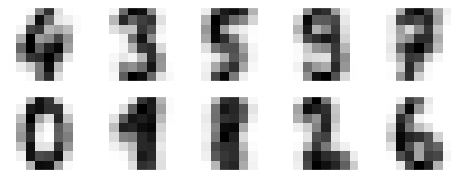

0.7935447968836951


Text(89.18, 0.5, 'predicted label')

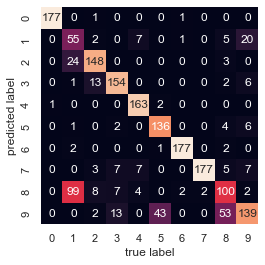

In [35]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
digits = load_digits()

X = digits.data # type: ignore
y = digits.target # type: ignore
print(digits.data.shape) # type: ignore

pca = PCA()
pca.fit(X)

variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

print(np.shape(digits.data)) # type: ignore
transformed = pca.transform(X)
transformed.shape

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data) # type: ignore
print(kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary) # type: ignore
    
plt.show()
    
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] # type: ignore
    
from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target, labels))

import seaborn as sns; sns.set()  # for plot styling

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
